In [1]:
import cv2
import matplotlib.pyplot as plt

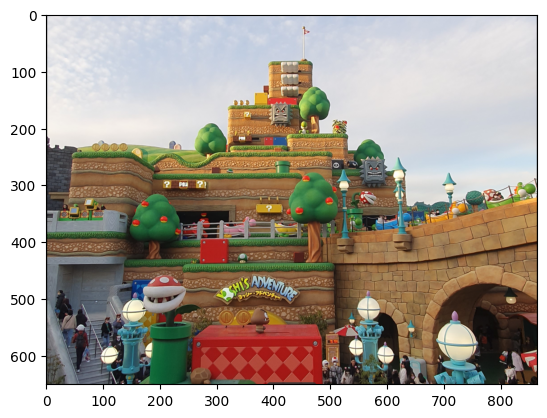

In [2]:
img1 = cv2.imread('./data/nintendo.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

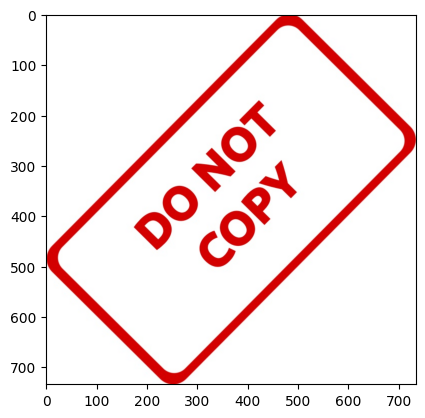

In [4]:
img2 = cv2.imread('./data/watermark_no_copy.jpeg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [5]:
img1.shape, img2.shape

((651, 865, 3), (734, 734, 3))

In [6]:
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
img1.shape, img2.shape

((651, 865, 3), (651, 865, 3))

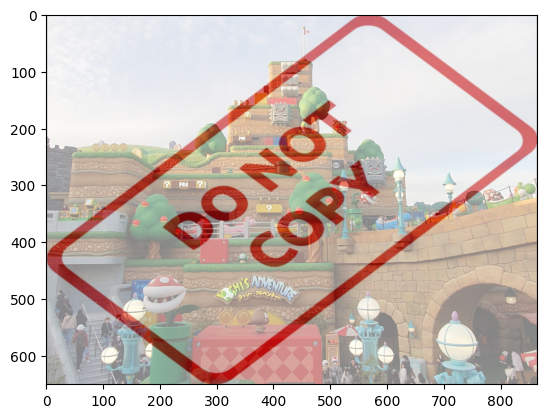

In [7]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)
plt.imshow(blended)

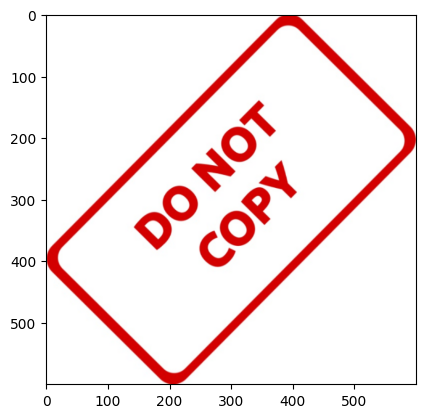

In [8]:
img2 = cv2.resize(img2, (600,600))
plt.imshow(img2)

In [9]:
large_img = img1
small_img = img2

x_offset = 0
y_offset = 0

In [10]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

large_img[y_offset:y_end, x_offset:x_end] = small_img

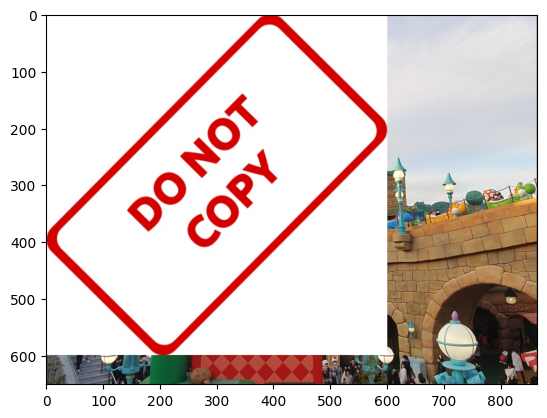

In [11]:
plt.imshow(large_img)

In [12]:
img1 = cv2.imread('./data/nintendo.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('./data/watermark_no_copy.jpeg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (600,600))

img1.shape, img2.shape

((651, 865, 3), (600, 600, 3))

In [13]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]
x_offset, y_offset

(265, 51)

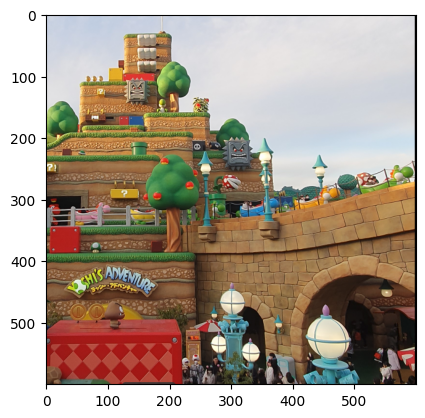

In [14]:
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]
plt.imshow(roi)

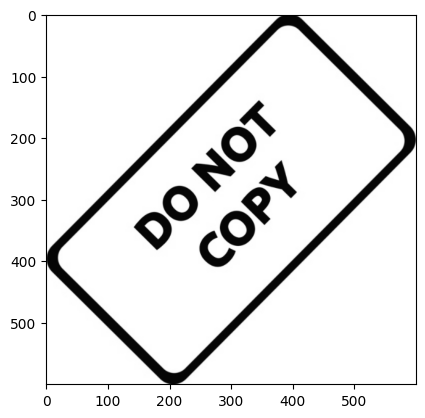

In [24]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray, cmap='gray')

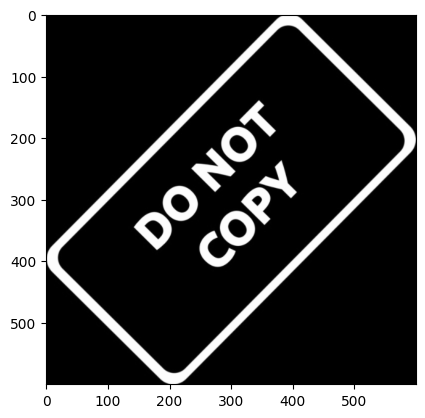

In [16]:
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv, cmap='gray')

In [17]:
mask_inv.shape

(600, 600)

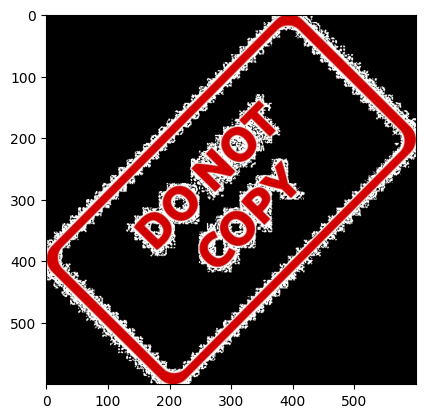

In [20]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)

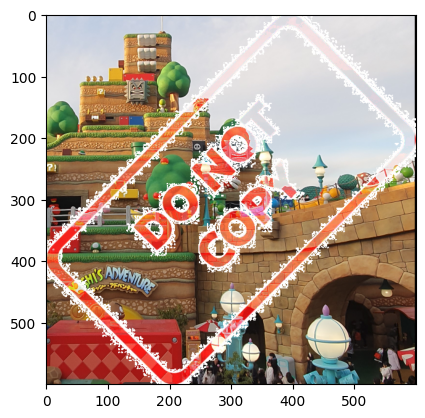

In [21]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

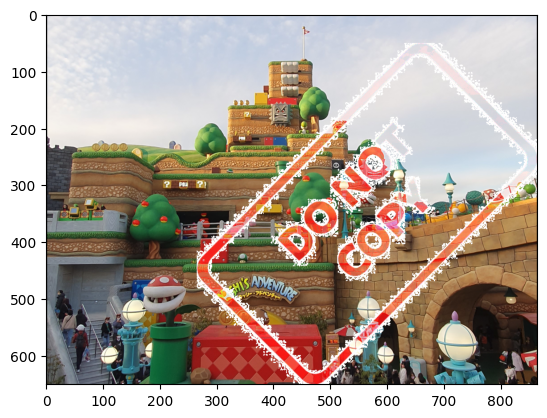

In [23]:
img1[y_offset:y_offset+img2.shape[0], x_offset:x_offset+img2.shape[1]] = final_roi
plt.imshow(img1)

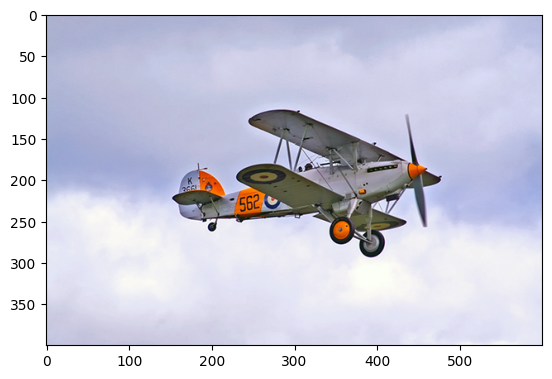

In [33]:
src = cv2.imread('./data/airplane.bmp', cv2.IMREAD_COLOR)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(src)

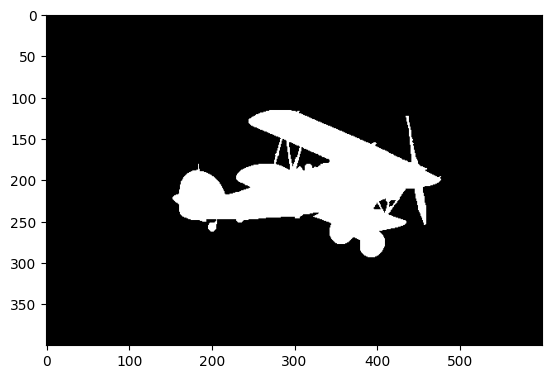

In [34]:
mask = cv2.imread('./data/mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(mask, cmap='gray')

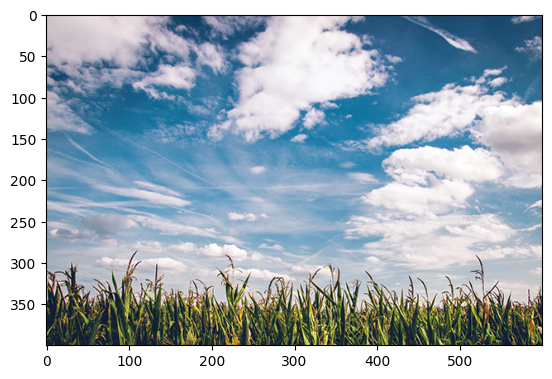

In [35]:
dst = cv2.imread('./data/field.bmp', cv2.IMREAD_COLOR)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

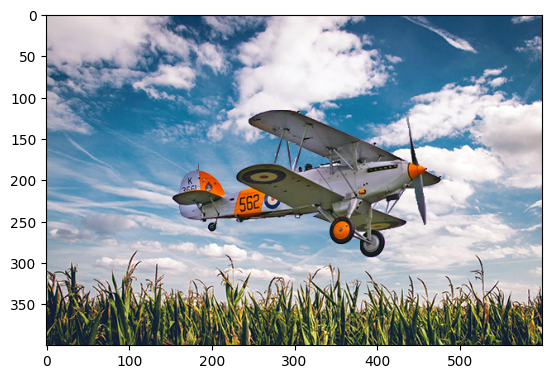

In [36]:
plt.imshow(cv2.copyTo(src, mask, dst))